#Visualizing Mamba with Context

        Model  Correct Answers  Accuracy (%)  Average Inference Time (s)
0  Mamba 130M                6           0.6                    0.172799
1  Mamba 370M                9           0.9                    0.339302
2  Mamba 790M                8           0.8                    0.308785
3  Mamba 1.4B               12           1.2                    0.372405
4  Mamba 2.8B               23           2.3                    0.445460


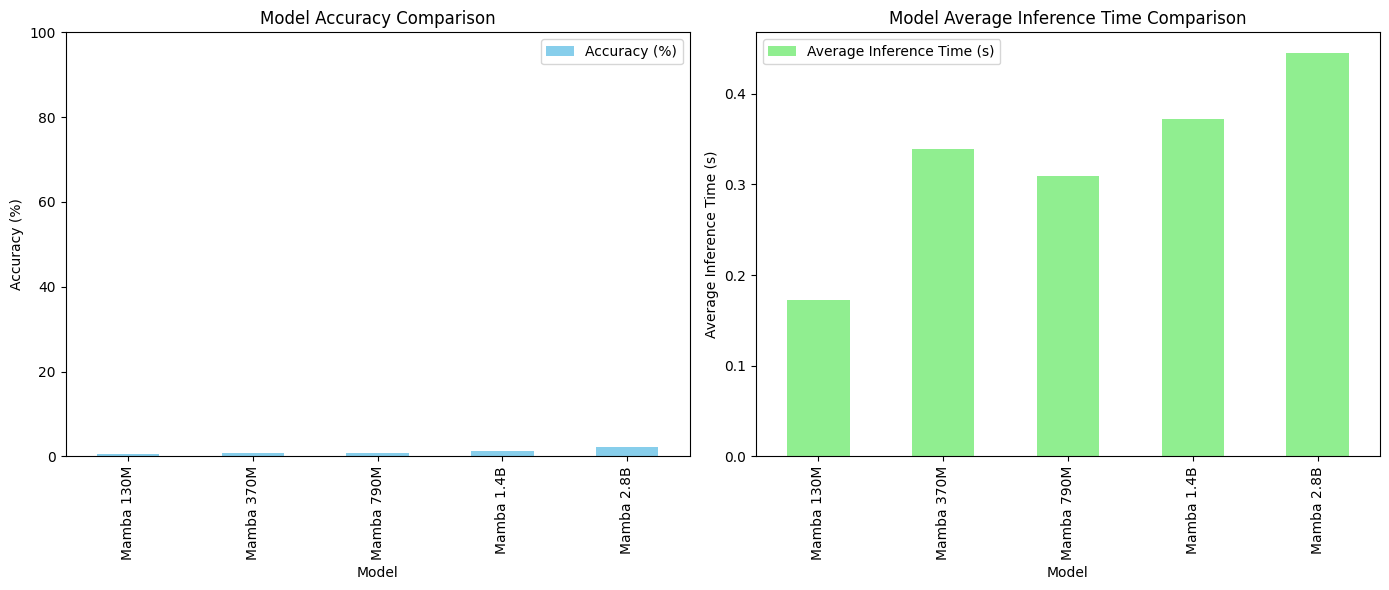

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# Function to load JSONL file into a pandas DataFrame
def load_jsonl(file_path):
    with open(file_path, 'r') as json_file:
        json_list = list(json_file)

    results = []
    for json_str in json_list:
        result = json.loads(json_str)
        results.append(result)
    return pd.DataFrame(results)

# Load the data for each model
models = {
    "Mamba 130M": "/content/mamba_130M_result_squad_val_1k.jsonl",
    "Mamba 370M": "/content/mamba_370M_result_squad_val_1k.jsonl",
    "Mamba 790M": "/content/mamba_790M_result_squad_val_1k.jsonl",
    "Mamba 1.4B": "/content/mamba_1.4B_result_squad_val_1k.jsonl",
    "Mamba 2.8B": "/content/mamba_2.8B_result_squad_val_1k.jsonl"
}

# Prepare the comparison data
comparison_data = []
for model_name, file_path in models.items():
    df = load_jsonl(file_path)
    correct_count = df['is_correct'].sum()
    accuracy_percentage = (df['is_correct'].mean() * 100)
    avg_time = df['time'].mean()

    comparison_data.append({
        "Model": model_name,
        "Correct Answers": correct_count,
        "Accuracy (%)": accuracy_percentage,
        "Average Inference Time (s)": avg_time
    })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df)

# Separate graphs for accuracy and inference time
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Accuracy plot
comparison_df.plot(x="Model", y="Accuracy (%)", kind="bar", ax=axes[0], color='skyblue')
axes[0].set_title("Model Accuracy Comparison")
axes[0].set_ylabel("Accuracy (%)")
axes[0].set_ylim(0, 100)  # Assuming accuracy is a percentage

# Inference time plot
comparison_df.plot(x="Model", y="Average Inference Time (s)", kind="bar", ax=axes[1], color='lightgreen')
axes[1].set_title("Model Average Inference Time Comparison")
axes[1].set_ylabel("Average Inference Time (s)")

# Layout adjustment
plt.tight_layout()

# Show plots
plt.show()


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from tqdm import tqdm
import torch
import time
import sys

# Assumed that the necessary imports and models setup are done here
# Assuming the models and tokenizers are properly initialized before this point

# Function to load JSONL file into a pandas DataFrame
def load_jsonl(file_path):
    with open(file_path, 'r') as json_file:
        json_list = list(json_file)

    results = []
    for json_str in json_list:
        result = json.loads(json_str)
        results.append(result)
    return pd.DataFrame(results)

# Load the data for each model
models = {
    "Mamba 130M": "/content/N-shot/mamba_130M_result_squad_val_1k (1).jsonl",
    "Mamba 370M": "/content/N-shot/mamba_370M_result_squad_val_1k (1).jsonl",
    "Mamba 790M": "/content/N-shot/mamba_790M_result_squad_val_1k.jsonl",
    "Mamba 1.4B": "/content/N-shot/mamba_1.4B_result_squad_val_1k.jsonl",
    "Mamba 2.8B": "/content/N-shot/mamba_2.8B_result_squad_val_1k.jsonl",
    "Mistral 7B": "/content/N-shot/mistral-7B_result_squad_val_1k.jsonl"
}

# Prepare the comparison data
comparison_data = []
for model_name, file_path in models.items():
    df = load_jsonl(file_path)
    correct_count = df['is_correct'].sum()
    accuracy_percentage = (df['is_correct'].mean() * 100)
    avg_time = df['time'].mean()
    avg_tokens = df['num_tokens'].mean() if 'num_tokens' in df.columns else None
    avg_tps = df['tokens_per_sec'].mean() if 'tokens_per_sec' in df.columns else None

    comparison_data.append({
        "Model": model_name,
        "Correct Answers": correct_count,
        "Accuracy (%)": accuracy_percentage,
        "Average Inference Time (s)": avg_time,
        "Average Tokens": avg_tokens,
        "Tokens per Second": avg_tps
    })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df)

        Model  Correct Answers  Accuracy (%)  Average Inference Time (s)  \
0  Mamba 130M                5           0.5                    1.228640   
1  Mamba 370M               19           1.9                    2.207594   
2  Mamba 790M               34           3.4                    2.212409   
3  Mamba 1.4B               44           4.4                    2.094651   
4  Mamba 2.8B               54           5.4                    2.746647   
5  Mistral 7B              436          43.6                    4.755080   

   Average Tokens  Tokens per Second  
0          87.481          76.684002  
1          87.481          40.863458  
2          87.481          40.626202  
3          87.481          43.003676  
4          87.481          32.725445  
5         546.769         122.149960  


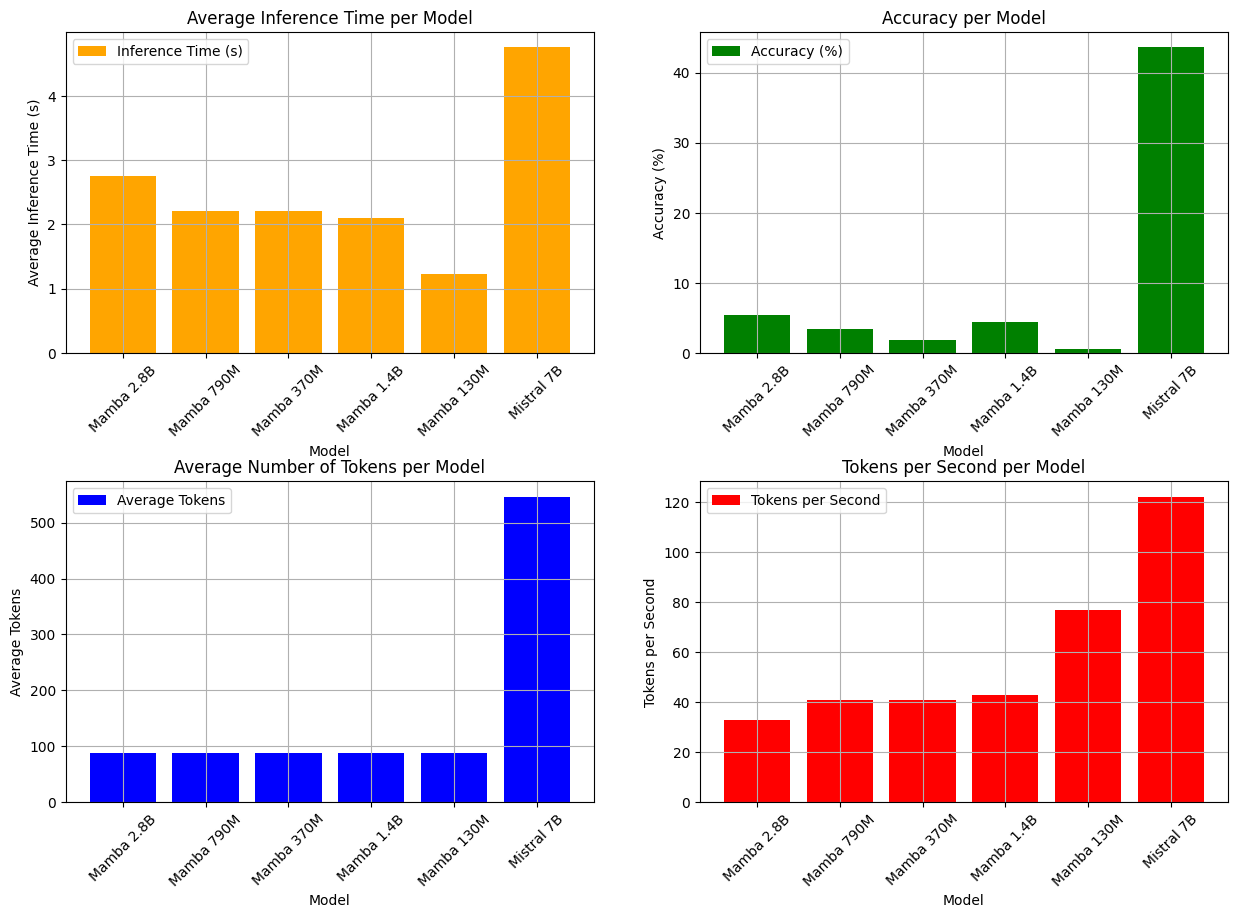

In [20]:
# Plot settings
plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace=0.4)

# Scatter plot for Average Inference Time
plt.subplot(2, 2, 1)
plt.bar(comparison_df['Model'], comparison_df['Average Inference Time (s)'], color='orange', label='Inference Time (s)')
plt.xlabel('Model')
plt.ylabel('Average Inference Time (s)')
plt.title('Average Inference Time per Model')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Scatter plot for Accuracy
plt.subplot(2, 2, 2)
plt.bar(comparison_df['Model'], comparison_df['Accuracy (%)'], color='green', label='Accuracy (%)')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy per Model')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Scatter plot for Average Number of Tokens
plt.subplot(2, 2, 3)
plt.bar(comparison_df['Model'], comparison_df['Average Tokens'], color='blue', label='Average Tokens')
plt.xlabel('Model')
plt.ylabel('Average Tokens')
plt.title('Average Number of Tokens per Model')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Scatter plot for Tokens per Second
plt.subplot(2, 2, 4)
plt.bar(comparison_df['Model'], comparison_df['Tokens per Second'], color='red', label='Tokens per Second')
plt.xlabel('Model')
plt.ylabel('Tokens per Second')
plt.title('Tokens per Second per Model')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show plots
plt.show()

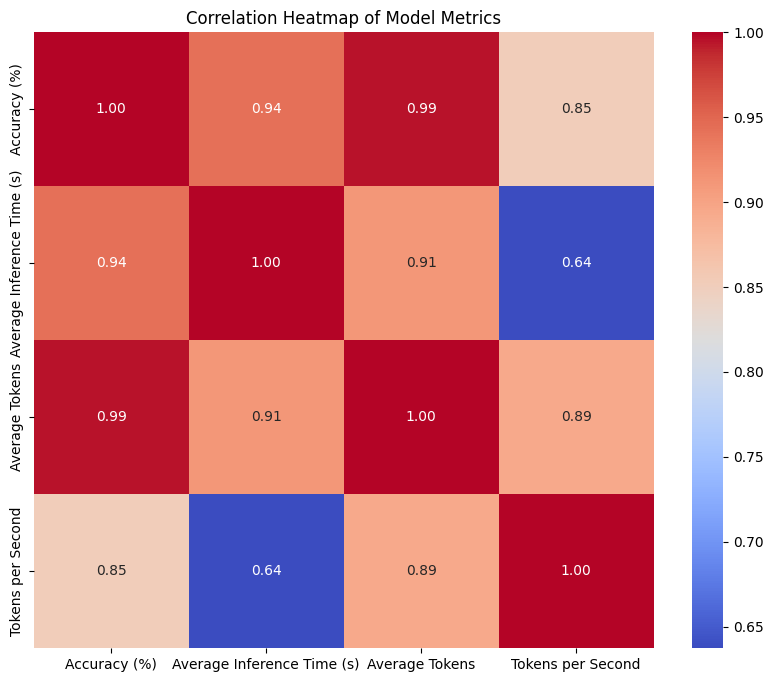

In [22]:
import seaborn as sns

# Assuming comparison_df is your DataFrame and has all the required metrics

# Calculate the correlation matrix
corr = comparison_df[['Accuracy (%)', 'Average Inference Time (s)', 'Average Tokens', 'Tokens per Second']].corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Model Metrics')
plt.show()


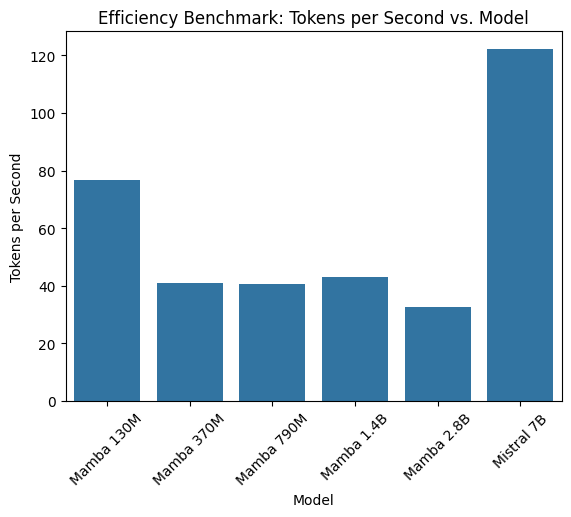

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'comparison_df' has all the data loaded
sns.barplot(x='Model', y='Tokens per Second', data=comparison_df)
plt.xticks(rotation=45)
plt.title('Efficiency Benchmark: Tokens per Second vs. Model')
plt.show()


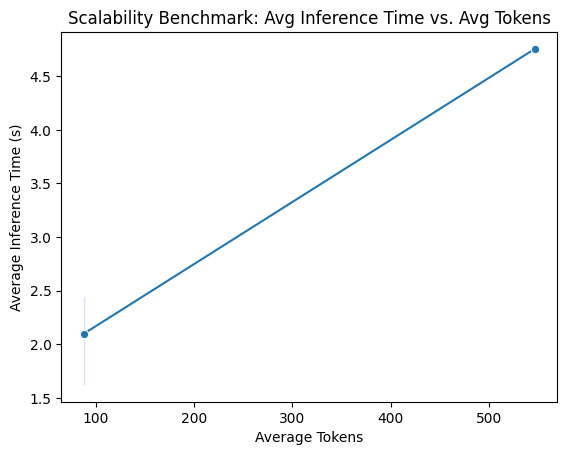

In [24]:
sns.lineplot(data=comparison_df, x='Average Tokens', y='Average Inference Time (s)', marker='o')
plt.title('Scalability Benchmark: Avg Inference Time vs. Avg Tokens')
plt.show()


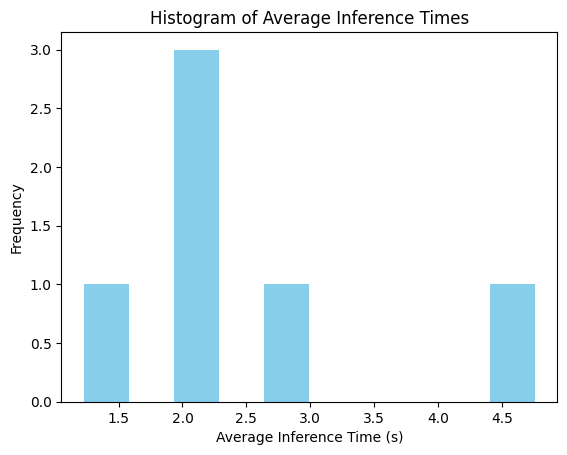

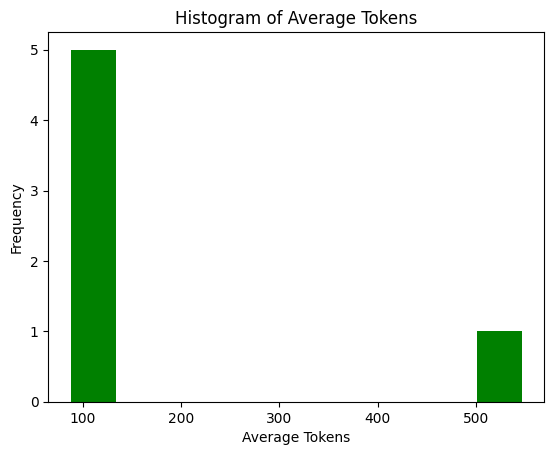

In [26]:
# Histogram of Inference Times
plt.hist(comparison_df['Average Inference Time (s)'], bins=10, color='skyblue')
plt.title('Histogram of Average Inference Times')
plt.xlabel('Average Inference Time (s)')
plt.ylabel('Frequency')
plt.show()

# Histogram of Number of Tokens
plt.hist(comparison_df['Average Tokens'], bins=10, color='green')
plt.title('Histogram of Average Tokens')
plt.xlabel('Average Tokens')
plt.ylabel('Frequency')
plt.show()


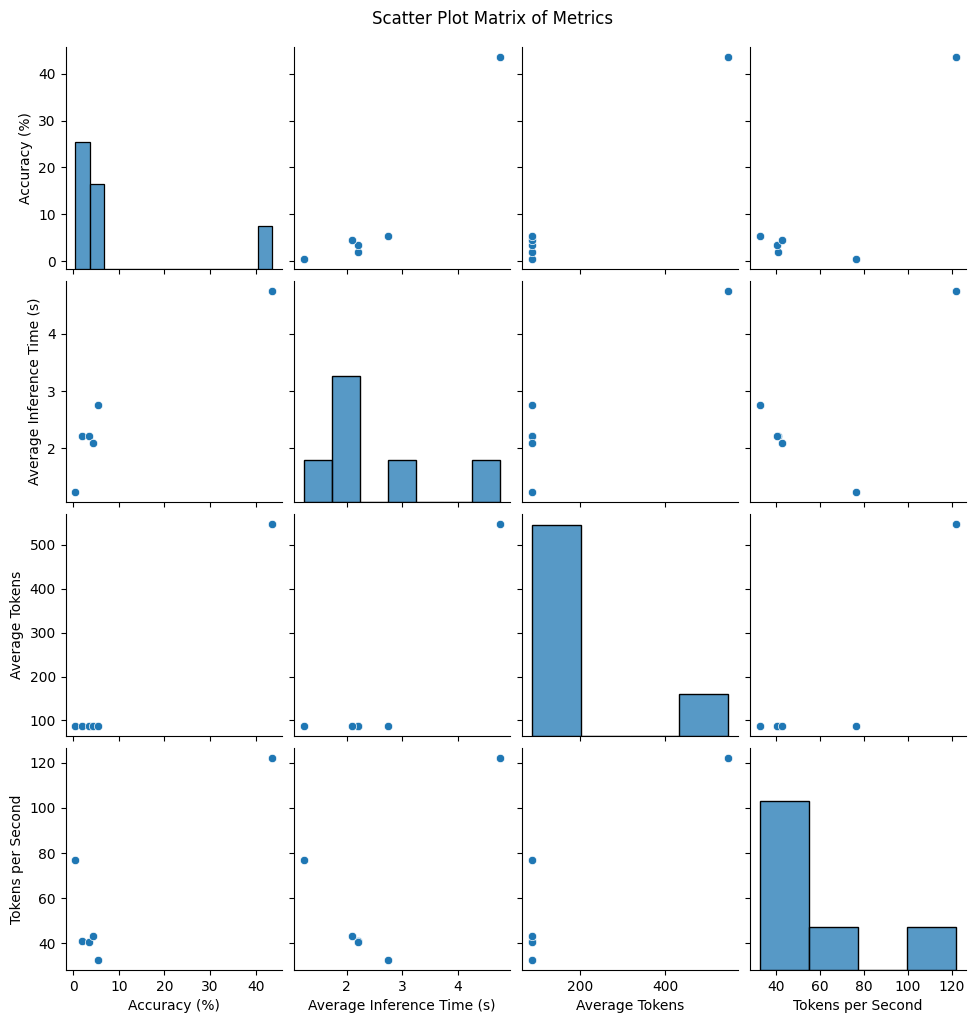

In [30]:
# Scatter plot matrix
sns.pairplot(comparison_df[['Accuracy (%)', 'Average Inference Time (s)', 'Average Tokens', 'Tokens per Second']])
plt.suptitle('Scatter Plot Matrix of Metrics', y=1.02)
plt.show()
